# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('online_news_pop/OnlineNewsPopularity.csv')   # Read the CSV file into a Pandas Dataframe
data.head()   # Peak into the first 5 rows of the dataset

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
data.shape    # Shape (rows, columns) of the dataset

(39644, 61)

In [5]:
data.info()   # Information about the columns of the dataset - name, datatype, count of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [6]:
# Does this dataset have any missing values?

if(data.isnull().values.any() == True):
  print("This dataset has some missing values which need to be handled")
  data = data.dropna()  # Rows with missing values (if any) are dropped

else:
  print("This dataset has no missing values. No action required.")

This dataset has no missing values. No action required.


In [7]:
# Does this dataset have any duplicate rows?

if(data.duplicated().values.any() == True):
  ndup = data[data.duplicated()].shape[0]
  print(f"This dataset has {ndup} duplicated rows")
  data = data.drop_duplicates()  # Rows with duplicate values (if any) are dropped
  print("\nThe duplicate rows have been dropped from the dataset now")

else:
  print("This dataset has no duplicated rows. No action required")



This dataset has no duplicated rows. No action required


In [8]:
data.describe().T     # Gives a descriptive statistical summary of the data columns

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [9]:
# Inspecting the target variable 'shares' - notice it is numeric, not categorical
data[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

Notice the target variable 'shares' is numeric, not categorical. Evidently, its distribution is right skewed

In [10]:
# Observing the correlation values of features wrt target variable 'shares'
corr_values = data.corr(numeric_only=True)[' shares'].sort_values(ascending=False).drop(' shares')
corr_values

 kw_avg_avg                       0.110413
 LDA_03                           0.083771
 kw_max_avg                       0.064306
 self_reference_avg_sharess       0.057789
 self_reference_min_shares        0.055958
 self_reference_max_shares        0.047115
 num_hrefs                        0.045404
 kw_avg_max                       0.044686
 kw_min_avg                       0.039551
 num_imgs                         0.039388
 global_subjectivity              0.031604
 kw_avg_min                       0.030406
 kw_max_min                       0.030114
 abs_title_sentiment_polarity     0.027135
 num_videos                       0.023936
 title_subjectivity               0.021967
 num_keywords                     0.021818
 is_weekend                       0.016958
 weekday_is_saturday              0.015082
 title_sentiment_polarity         0.012772
 avg_positive_polarity            0.012142
 max_positive_polarity            0.010068
 weekday_is_monday                0.009726
 n_tokens_t

In [11]:
data[corr_values.index.values[0:4]]

,kw_avg_avg,LDA_03,kw_max_avg,self_reference_avg_sharess
0,0.000000,0.041263,0.000000,496.000000
1,0.000000,0.050101,0.000000,0.000000
2,0.000000,0.033334,0.000000,918.000000
3,0.000000,0.028905,0.000000,0.000000
4,0.000000,0.028572,0.000000,3151.157895
...,...,...,...,...
39639,3031.115764,0.025000,4004.342857,37033.333333
39640,3411.660830,0.681635,5470.168651,2100.000000
39641,4206.439195,0.643794,6880.687034,1400.000000
39642,1777.895883,0.040002,3384.316871,452.000000


In [12]:
# from pandas.plotting import scatter_matrix

# # scatter_matrix(data[corr_values.index.values[0:4]], figsize=(10,10))
# attribs = [' shares', 'kw_avg_avg', 'LDA_03', 'kw_max_avg', 'self_reference_avg_sharess']
# scatter_matrix(data.loc[attribs], figsize=(12,8))

# Dataset Preparation

Deriving a binary target variable 'popularity' from 'shares' such that if number of shares is greater than the median value of 1400, it is considered popular (represented by 1), and otherwise unpopular (represented by 0).
 

In [13]:
data['popularity'] = np.where(data[' shares'] >= data[' shares'].median(), 1, 0)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.0,164.000000,339.000000,542.000000,731.0
n_tokens_title,39644.0,10.398749,2.114037,2.0,9.000000,10.000000,12.000000,23.0
n_tokens_content,39644.0,546.514731,471.107508,0.0,246.000000,409.000000,716.000000,8474.0
n_unique_tokens,39644.0,0.548216,3.520708,0.0,0.470870,0.539226,0.608696,701.0
n_non_stop_words,39644.0,0.996469,5.231231,0.0,1.000000,1.000000,1.000000,1042.0
...,...,...,...,...,...,...,...,...
title_sentiment_polarity,39644.0,0.071425,0.265450,-1.0,0.000000,0.000000,0.150000,1.0
abs_title_subjectivity,39644.0,0.341843,0.188791,0.0,0.166667,0.500000,0.500000,0.5
abs_title_sentiment_polarity,39644.0,0.156064,0.226294,0.0,0.000000,0.000000,0.250000,1.0
shares,39644.0,3395.380184,11626.950749,1.0,946.000000,1400.000000,2800.000000,843300.0


Preparing various input datasets for experiments:

1) Regular dataset: X
2) Standardised dataset: X_std
3) PCA Reduced dataset: X_pca

In [14]:
# 1) Regular Dataset

X = data.drop(['url', ' shares','popularity'], axis=1)  # Stores the input attributes data
y = data['popularity']                                  # Stores the target variable data 

# Import Scikit-Learn's train_test_split to split the data into 80% training and 20% testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Inspecting the shape of the dataset and taking a peak into it
print(f"\nNumber of samples and attributes of X: {X.shape}\n")
X.head()


Number of samples and attributes of X: (39644, 59)



,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [15]:
# 2) Standardized Dataset

# Standardizing the data subtracts the mean and scales the values to unit standard deviation
# It is applied to the input data to bring values to a standard range.

# Using the StandardScaler class to transform the regular data to Standardized data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X))

# Using train_test_split to create a new split for the Standardized input data
X_train_std, X_test_std = train_test_split(X_std, test_size=0.2, stratify=y, random_state=42)

# Inspecting the shape of the dataset after Standardization and taking a peak into it
print(f"\nNumber of samples and attributes of X after standardization: {X_std.shape}\n")
X_std.head()


Number of samples and attributes of X after standardization: (39644, 59)



,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.75788,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,...,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920
1,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,...,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658
2,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,...,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658
3,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,...,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658
4,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,...,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056


In [16]:
# 3) PCA Reduced Dataset

# Using PCA class to reduce dimensionality of the data from 59 to 20
from sklearn.decomposition import PCA
pca_n = PCA(n_components=20)
X_pca = pd.DataFrame(pca_n.fit_transform(X_std))

X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)

print(f'Number of samples and attributes of X after PCA reduction: {X_pca.shape}')
X_pca.head()

Number of samples and attributes of X after PCA reduction: (39644, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.357661,-1.883984,-1.973543,0.000862,0.433122,-3.606862,1.420406,-1.424979,0.461474,0.250496,0.369373,1.113990,1.806458,0.068482,0.945103,-0.675788,-0.117430,2.084695,-0.598429,0.780753
1,0.196446,-4.305411,-1.136261,0.081100,-0.352089,-1.566322,3.366486,0.305278,1.897301,-1.308131,0.632881,0.006870,0.500091,0.485989,-0.908971,-0.531232,0.065286,1.912320,-0.854713,0.873698
2,-3.731286,-3.498287,-1.734962,-0.076656,-0.386642,-0.859242,2.504199,-0.273831,-0.267768,-0.608559,-0.275613,-0.137426,0.400548,-0.551986,-0.019161,-0.035476,0.064608,1.586186,-1.527655,1.149062
3,-0.670038,-1.695261,-3.436222,-0.105381,1.188064,-2.169229,1.392922,-1.011030,-0.531836,-0.920219,0.013519,2.146717,0.792182,0.379293,0.360662,-0.571698,-0.179683,1.808636,-0.819716,0.729258
4,-4.169848,-3.718659,-1.441581,-0.133908,0.374838,0.346331,-2.741867,-1.425411,0.531121,-0.897372,2.857285,-0.692618,-0.083504,0.660210,0.856850,-0.690088,-0.189896,2.555974,-0.373074,0.947155


# Dimensionality Reduction & Data Visualisation

## Principal Component Analysis (PCA)

Principal Component Analysis reduces the features of the data by finding their directions of maximum variance and projecting the data along those directions, thus preserving information of the original attributes and also reducing the size of the dataset for better computations and visualisations.

In [17]:
# Here, we reduce the dimensions of the input data from 81 to 2 so that it can be visualised in 3D

from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
X_2D_pca = pca2.fit_transform(X_std)

print(f'\nPCA Features: Number of samples and attributes: {X_2D_pca.shape}')


PCA Features: Number of samples and attributes: (39644, 2)


3D Point Cloud with respect to target variable - number of shares

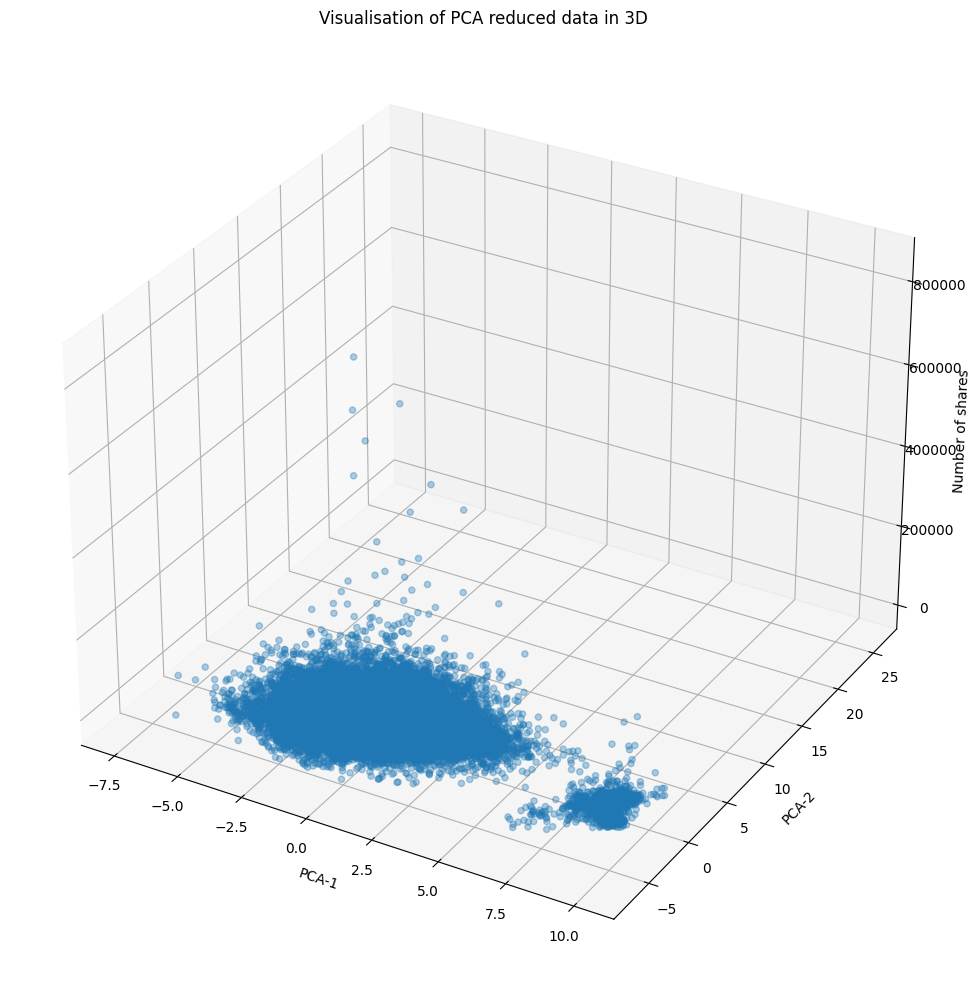

In [18]:
# Visualising the 3D point cloud of the PCA reduced dataset against the original target variable 'shares'

y_shares = data[' shares']

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_2D_pca[:, 0], X_2D_pca[:, 1], y_shares, alpha=0.35);

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Number of shares")

plt.title("Visualisation of PCA reduced data in 3D")
plt.tight_layout()
plt.show()
# fig.savefig('PCA visualisation.png')

Differentiating data points by colour based on their popularity

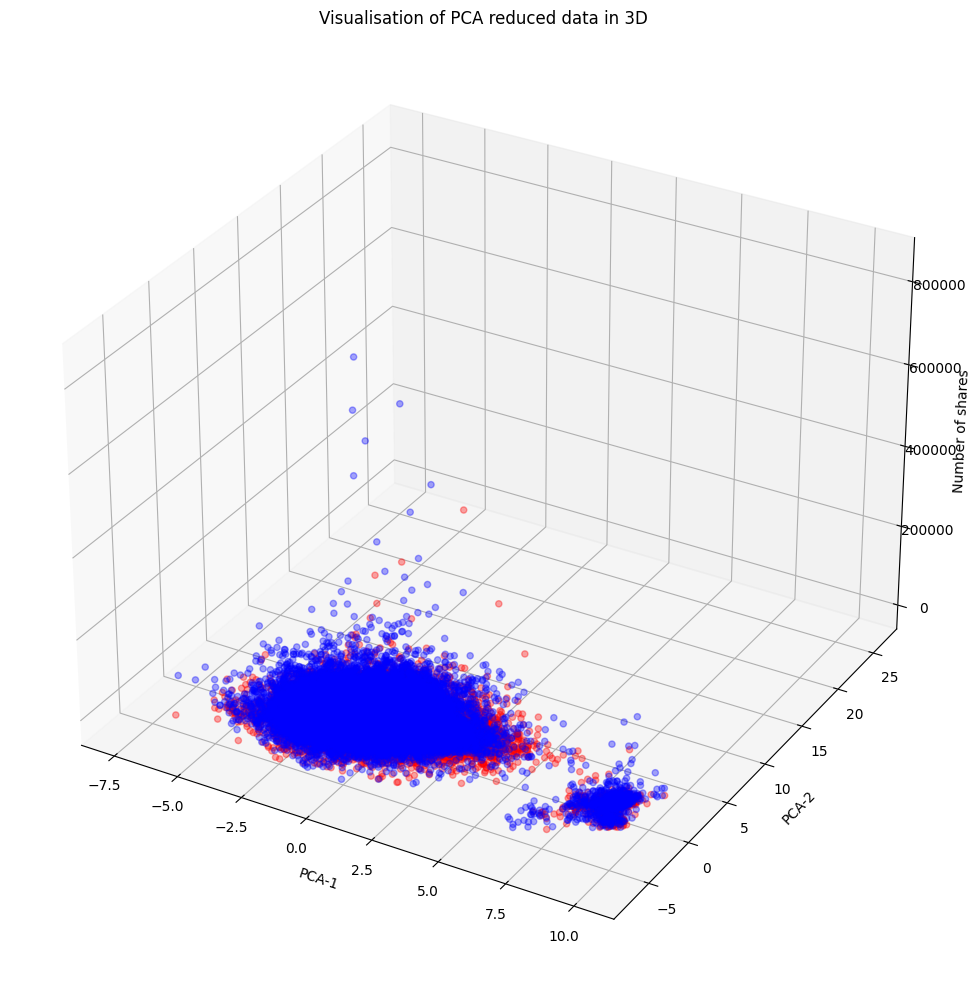

In [19]:
# Visualising the 3D point cloud of the PCA reduced dataset against the categorical target variable 'popularity'

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Plotting separate 3D Scatterplots based on class labels of target variable 'popularity'
ax.scatter(X_2D_pca[y==0, 0], X_2D_pca[y==0, 1], y_shares[y==0], color="r", alpha=0.35); 
ax.scatter(X_2D_pca[y==1, 0], X_2D_pca[y==1, 1], y_shares[y==1], color="b", alpha=0.35); 

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Number of shares")

plt.title("Visualisation of PCA reduced data in 3D")
plt.tight_layout()
plt.show()
# fig.savefig('PCA visualisation.png')

The point cloud appears to form two clusters - one large cluster for higher values of PCA-1 and another small for cluster for lower values of PCA-1. Otherwise, there appears to be no distinct separation between popular (blue) and unpopular (red) data points with respect to the PCA features.

Viewing a zoomed-in vertical cross section of the above plot to get a better view of how the popular (blue) and unpopular (red) data points are distributed relative to each other

Text(0, 0.5, 'Number of shares')

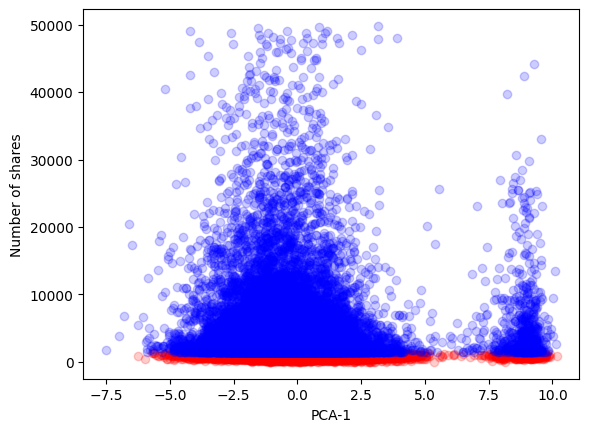

In [20]:
# Removing outliers to get a closer view of the body of the data - here we consider only data for which shares<50,000
X_2D_pca_50 = X_2D_pca[y_shares < 50000]
y_shares_50 = y_shares[y_shares < 50000]
y_50 = y[y_shares < 50000]

plt.scatter(X_2D_pca_50[y_50==0, 0], y_shares_50[y_50==0], color='r', alpha=0.20)
plt.scatter(X_2D_pca_50[y_50==1, 0], y_shares_50[y_50==1], color='b', alpha=0.20)
plt.xlabel("PCA-1")
plt.ylabel("Number of shares")

Since we decided to consider data points with number of shares > 1400 as popular and the rest as unpopular, a clear demarcation can be seen separating the blue points from the red at the level of 1400. The two clusters of data formed is also visible.

Visualising the point cloud, this time mapping the features to the binary classified target variable 'popularity'

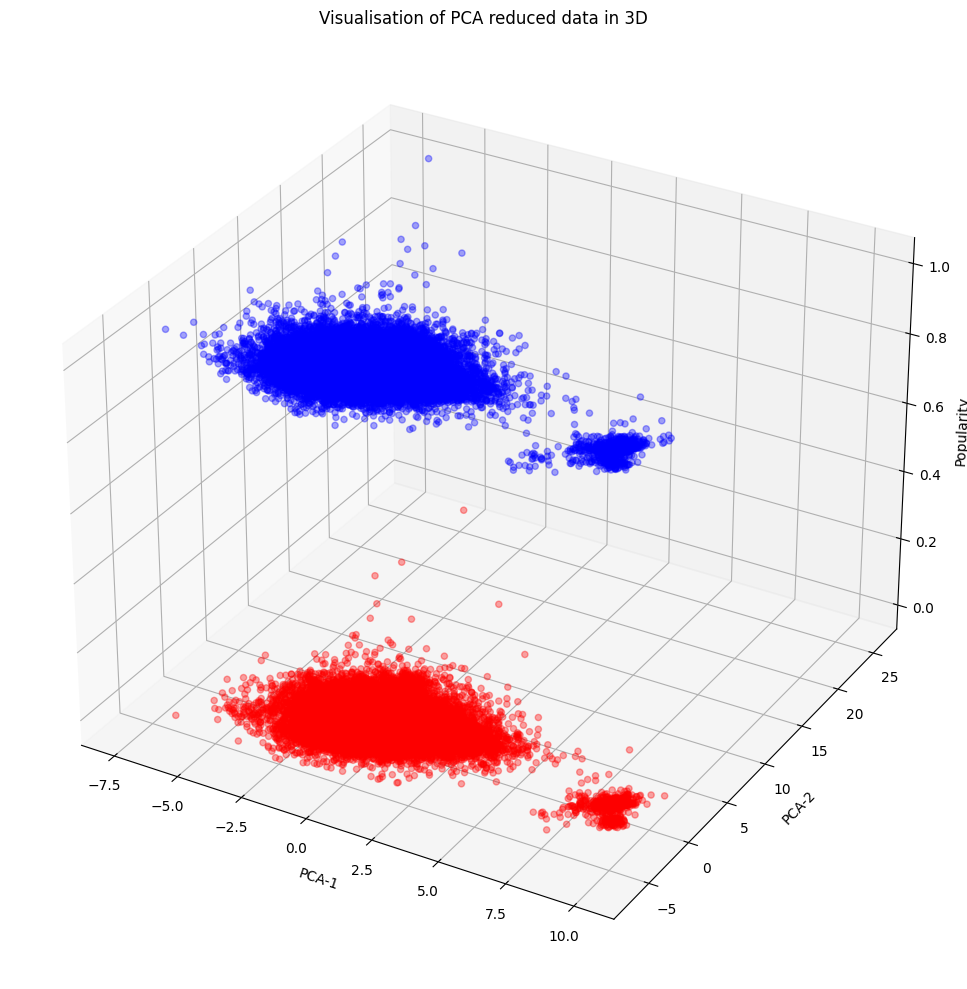

In [21]:
# Visualising the 3D point cloud of the PCA reduced dataset against the categorical target variable 'popularity'

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Plotting separate 3D Scatterplots based on class labels of target variable 'popularity'
ax.scatter(X_2D_pca[y==0, 0], X_2D_pca[y==0, 1], y[y==0], color="r", alpha=0.35); 
ax.scatter(X_2D_pca[y==1, 0], X_2D_pca[y==1, 1], y[y==1], color="b", alpha=0.35); 

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Popularity")

plt.title("Visualisation of PCA reduced data in 3D")
plt.tight_layout()
plt.show()
# fig.savefig('PCA visualisation.png')

## t-Distributed Stochastic Neighbour Embedding (t-SNE)

tSNE is a nonlinear dimensionality reduction technique that uses similarity between datapoints to construct probability distributions and replicates them in lower dimensions and thus reduces the dimensionality while preserving the structure of the data as much as possible. It is a Manifold approach.

In [22]:
# from sklearn.manifold import TSNE
# tsne2 = TSNE(n_components=2, init='pca', learning_rate='auto')
# X_2D_tsne = tsne2.fit_transform(X_pca)
# print(f'tSNE Embedding: Number of samples and attributes: {X_2D_tsne.shape}')

In [23]:
# Visualising the 3D point cloud of the tSNE reduced dataset against the target variable 'Critical Temperature'

'''
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_2D_tsne[y==0, 0], X_2D_tsne[y==0, 1], y[y==0], color="r", alpha=0.35); 
ax.scatter(X_2D_tsne[y==1, 0], X_2D_tsne[y==1, 1], y[y==1], color="b", alpha=0.35); 

ax.set_xlabel("tSNE-1")
ax.set_ylabel("tSNE-2")
ax.set_zlabel("Popularity")

plt.title("Visualisation of tSNE reduced data in 3D")
plt.tight_layout()
plt.show()
fig.savefig('tSNE visualisation.png')
'''

'\nfig = plt.figure(figsize=(10, 10))\nax = fig.add_subplot(projection=\'3d\')\n\nax.scatter(X_2D_tsne[y==0, 0], X_2D_tsne[y==0, 1], y[y==0], color="r", alpha=0.35); \nax.scatter(X_2D_tsne[y==1, 0], X_2D_tsne[y==1, 1], y[y==1], color="b", alpha=0.35); \n\nax.set_xlabel("tSNE-1")\nax.set_ylabel("tSNE-2")\nax.set_zlabel("Popularity")\n\nplt.title("Visualisation of tSNE reduced data in 3D")\nplt.tight_layout()\nplt.show()\nfig.savefig(\'tSNE visualisation.png\')\n'

In [24]:
# # Visualising the 2D point cloud of the tSNE-1 feature against the target variable 'Critical Temperature'
# plt.scatter(X_2D_tsne[:, 0], y, alpha=0.35)
# plt.xlabel("tSNE-1")
# plt.ylabel("Critical Temp")

In [25]:
# # Visualising the 2D point cloud of the tSNE-2 feature against the target variable 'Critical Temperature'
# plt.scatter(X_2D_tsne[:, 1], y, alpha=0.35)
# plt.xlabel("tSNE-2")
# plt.ylabel("Critical Temp")

# Baseline Model - Logistic Regression

## Regular Data

In [26]:
# Creating a logistic regression model and fitting it to the training data

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# The model's score on the testing data
print("REGULAR DATA")
lr_score = lr_clf.score(X_test, y_test)
print('Classification accuracy: ', lr_score)

REGULAR DATA
Classification accuracy:  0.584815235212511


/home/pranavr/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


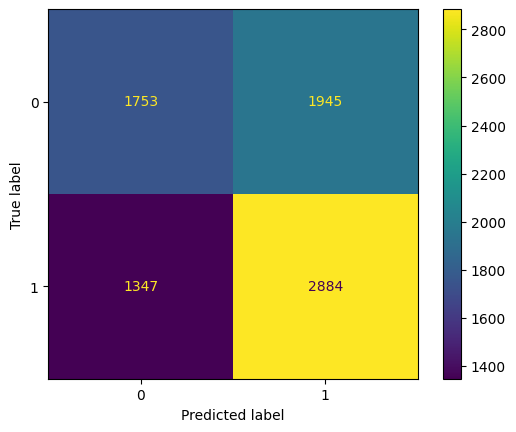

In [27]:
# Model's predictions on the test data
y_pred = lr_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# confMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred))
disp.plot()
plt.show()

In [28]:
# # Model's predictions on the test data
# y_pred = lr_clf.predict(X_test)
# print(y_pred.shape)

# # Scatter plot of the model's predictions vs the actual values
# plt.scatter(y_pred[y_test==0], y_test[y_test==0], color='r', alpha=0.35)
# plt.scatter(y_pred[y_test==1], y_test[y_test==1], color='b', alpha=0.35)
# plt.xlabel("Predicted values")
# plt.ylabel("Actual values")
# plt.title("Scatterplot of Actual values vs Predicted values")
# plt.show()
# print('\n')s

# # Histogram of the residuals
# # plt.hist(y_test - y_pred)
# # plt.title("Histogram of model's residual errors")
# # plt.show()

In [29]:
# # Cross validation of the model using 10 folds in terms of mean +/- std

# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(lr_clf, X_train, y_train, cv=5)
# print('\n', scores.mean(), '+/-', scores.std())

## Standardized Data

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std  = sc.fit_transform(X_test)

In [31]:
lr_clf_std = LogisticRegression()
lr_clf_std.fit(X_train_std, y_train)

# The model's score on the testing data after standardization

print("Score after standardization:", lr_clf_std.score(X_test_std, y_test))

# y_test.head()

Score after standardization: 0.6068861142640938


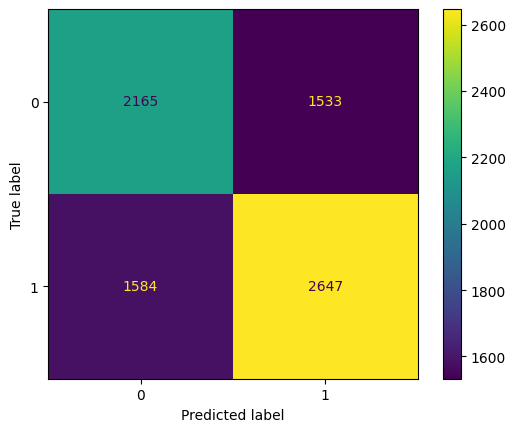

In [32]:
disp_lr_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = lr_clf_std.predict(X_test_std)))
disp_lr_std.plot()
plt.show()

In [33]:
data = data.drop(' shares', axis=1)

## PCA Data

In [34]:
from sklearn.decomposition import PCA

pca_n = PCA(n_components=5)
X_pca = pca_n.fit_transform(X_std)

X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)

print(X_pca.shape)

(39644, 5)


In [35]:
lr_clf_pca = LogisticRegression()
lr_clf_pca.fit(X_train_pca, y_train)

print("Score after PCA:", lr_clf_pca.score(X_test_pca, y_test))

Score after PCA: 0.533610795812839


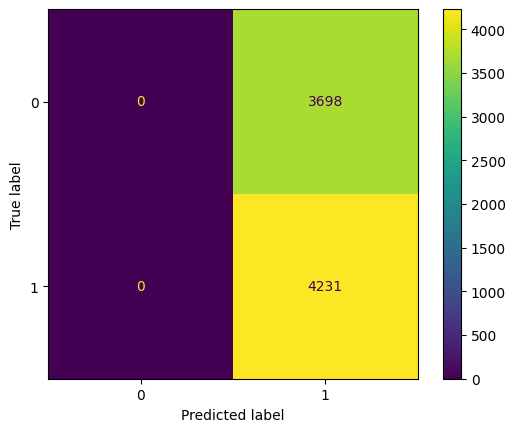

In [36]:
disp_lr_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = lr_clf_pca.predict(X_test_pca)))
disp_lr_pca.plot()
plt.show()

### Classification Reports

In [37]:
# Baseline Logistic Regression

from sklearn.metrics import classification_report

baseline_lr_report = classification_report(y_test, lr_clf.predict(X_test))
print(baseline_lr_report)

              precision    recall  f1-score   support

           0       0.57      0.47      0.52      3698
           1       0.60      0.68      0.64      4231

    accuracy                           0.58      7929
   macro avg       0.58      0.58      0.58      7929
weighted avg       0.58      0.58      0.58      7929



In [38]:
# After Standardization

baseline_lr_std_report = classification_report(y_test, lr_clf_std.predict(X_test_std))
print(baseline_lr_std_report)

              precision    recall  f1-score   support

           0       0.58      0.59      0.58      3698
           1       0.63      0.63      0.63      4231

    accuracy                           0.61      7929
   macro avg       0.61      0.61      0.61      7929
weighted avg       0.61      0.61      0.61      7929



In [39]:
baseline_lr_pca_report = classification_report(y_test, lr_clf_pca.predict(X_test_pca))
print(baseline_lr_pca_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3698
           1       0.53      1.00      0.70      4231

    accuracy                           0.53      7929
   macro avg       0.27      0.50      0.35      7929
weighted avg       0.28      0.53      0.37      7929



/home/pranavr/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pranavr/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pranavr/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVC    
#### LinearSVC

In [40]:
from sklearn.svm import LinearSVC

linearsvc = LinearSVC(tol=0.01, C=2)
linearsvc.fit(X_train, y_train)

linearsvc.score(X_test, y_test)

/home/pranavr/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.513431706394249

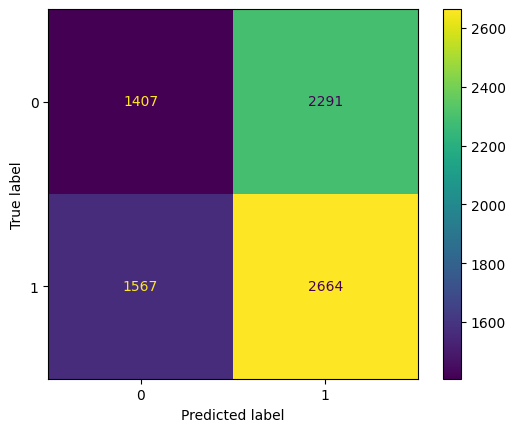

In [41]:
disp_linearsvc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = linearsvc.predict(X_test)))
disp_linearsvc.plot()
plt.show()

In [42]:
linearsvc_report = classification_report(y_test, linearsvc.predict(X_test))
print(linearsvc_report)

              precision    recall  f1-score   support

           0       0.47      0.38      0.42      3698
           1       0.54      0.63      0.58      4231

    accuracy                           0.51      7929
   macro avg       0.51      0.51      0.50      7929
weighted avg       0.51      0.51      0.51      7929



In [43]:
linearsvc_std = LinearSVC(tol=0.01, C=2)
linearsvc_std.fit(X_train_std, y_train)

linearsvc_std.score(X_test_std, y_test)

/home/pranavr/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5891032917139614

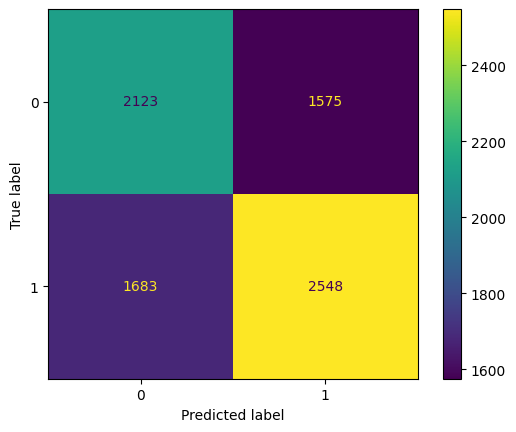

In [44]:
disp_linearsvc_std = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = linearsvc_std.predict(X_test_std)))
disp_linearsvc_std.plot()
plt.show()

In [45]:
linearsvc_std_report = classification_report(y_test, linearsvc.predict(X_test_std))
print(linearsvc_std_report)

              precision    recall  f1-score   support

           0       0.51      0.62      0.56      3698
           1       0.60      0.49      0.54      4231

    accuracy                           0.55      7929
   macro avg       0.56      0.55      0.55      7929
weighted avg       0.56      0.55      0.55      7929



/home/pranavr/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [46]:
linearsvc_pca = LinearSVC(tol=0.01, C=2)
linearsvc_pca.fit(X_train_pca, y_train)

linearsvc_pca.score(X_test_pca, y_test)

/home/pranavr/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.533610795812839

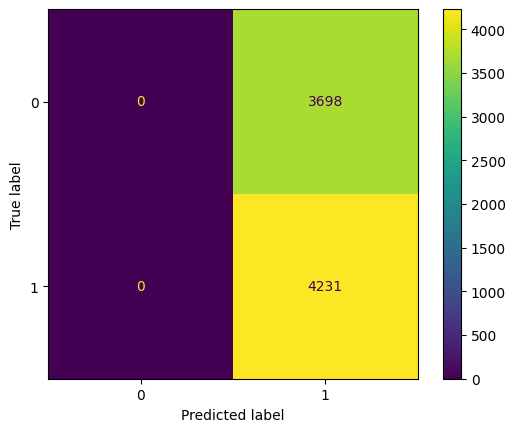

In [47]:
disp_linearsvc_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = linearsvc_pca.predict(X_test_pca)))
disp_linearsvc_pca.plot()
plt.show()

In [48]:
linearsvc_pca_report = classification_report(y_test, linearsvc_pca.predict(X_test_pca))
print(linearsvc_pca_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3698
           1       0.53      1.00      0.70      4231

    accuracy                           0.53      7929
   macro avg       0.27      0.50      0.35      7929
weighted avg       0.28      0.53      0.37      7929



/home/pranavr/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pranavr/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pranavr/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM   
#### Kernel SVM

In [72]:
from sklearn import svm

kernelsvm_linear = svm.SVC(kernel='linear')
kernelsvm_linear.fit(X_train_pca[0:5000], y_train[0:5000])

kernelsvm_linear.score(X_test_pca, y_test)

0.533610795812839

In [54]:
# disp_kernelsvm_linear = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = kernelsvm_linear.predict(X_test_pca)))
# disp_kernelsvm_linear.plot()
# plt.show()

In [55]:
# kernelsvm_linear_report = classification_report(y_test, kernelsvm_linear.predict(X_test_pca))
# print(kernelsvm_linear_report)

In [61]:
y_train.shape

(31715,)

In [62]:
kernelsvm_rbf = svm.SVC(kernel='rbf')
kernelsvm_rbf.fit(X_train_pca, y_train)

kernelsvm_rbf.score(X_test_pca, y_test)

0.5324757220330433

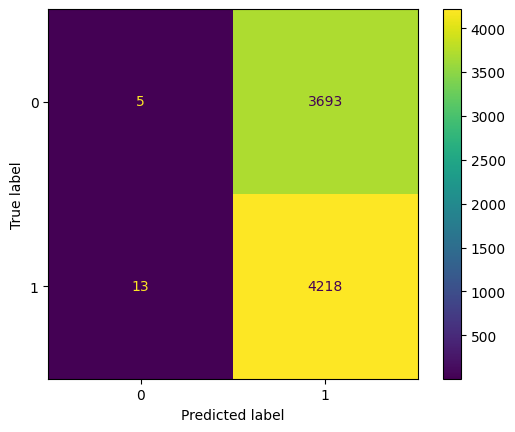

In [57]:
disp_kernelsvm_rbf = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = kernelsvm_rbf.predict(X_test_pca)))
disp_kernelsvm_rbf.plot()
plt.show()

In [58]:
kernelsvm_rbf_report = classification_report(y_test, kernelsvm_rbf.predict(X_test_pca))
print(kernelsvm_rbf_report)

              precision    recall  f1-score   support

           0       0.28      0.00      0.00      3698
           1       0.53      1.00      0.69      4231

    accuracy                           0.53      7929
   macro avg       0.41      0.50      0.35      7929
weighted avg       0.41      0.53      0.37      7929



In [ ]:
# kernelsvm_poly = svm.SVC(kernel='poly', degree=2)
# kernelsvm_poly.fit(X_train_pca[0:1000], y_train[0:1000])

# kernelsvm_poly.score(X_test_pca, y_test)

In [ ]:
# disp_kernelsvm_poly = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = kernelsvm_poly.predict(X_test_pca)))
# disp_kernelsvm_poly.plot()
# plt.show()

In [ ]:
# kernelsvm_poly_report = classification_report(y_test, kernelsvm_poly.predict(X_test_pca))
# print(kernelsvm_linear_report)

In [67]:
# Perform cross validation of 5 folds on lr_clf logistic regression model

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf_pca, X_train_pca, y_train, cv=5, scoring='f1_macro')
print(f"Cross-validation scores for logistic with PCA: {scores.mean()} +/- {scores.std()}")

Cross-validation scores for logistic with PCA: 0.5336276209995271 +/- 6.306164275580172e-05


In [68]:
score_svc = cross_val_score(linearsvc_pca, X_train_pca, y_train, cv=5, scoring='f1_macro')
print(f"Cross-validation scores for LinearSVC: {score_svc.mean()} +/- {score_svc.std()}")

# Cross-validation f-1 score for logistic regression with PCA

/home/pranavr/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pranavr/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pranavr/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/pranavr/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Cross-validation scores for LinearSVC: 0.5335960901781491 +/- 0.0002561576038037504


/home/pranavr/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# score_rbf = cross_val_score(kernelsvm_rbf, X_train_pca, y_train, cv=5)
# print(f"Cross-validation scores for RBF: {score_rbf.mean()} +/- {score_rbf.std()}")

# May take ~15 mins to run

## Results

In [49]:
row_names = ['Linear Regression', 'Quadratic Regression', 'Lasso (L1)', 'Ridge (L2)', 'ElasticNet', 'LinearSVR', 'SVR Linear', 'SVR Quadratic', 'SVR RBF']
col_names = ['Regular Data', 'Standardized Data', 'PCA Reduced Data']
score_matrix = np.array([lin_score, lin_score_std, lin_score_pca, poly_score, poly_score_std, poly_score_pca, lasso_score, lasso_score_std, lasso_score_pca, ridge_score, ridge_score_std, ridge_score_pca, elnet_score, elnet_score_std, elnet_score_pca, linsvr_score, linsvr_score_std, linsvr_score_pca, 0, 0, svr_lin_score, 0, 0, svr_poly_score, 0, 0, svr_rbf_score]).reshape(9,3)
score_df = pd.DataFrame(score_matrix, columns=col_names, index=row_names)
score_df = score_df.replace(0, '-')
score_df

,Regular Data,Standardized Data,PCA Reduced Data
Linear Regression,0.73536,0.73536,0.634786
Quadratic Regression,-0.122222,-0.121058,0.773668
Lasso (L1),0.723197,0.710664,0.634479
Ridge (L2),0.735348,0.735339,0.634786
ElasticNet,0.720927,0.698189,0.633918
LinearSVR,0.66723,0.717747,0.624384
SVR Linear,-,-,0.624599
SVR Quadratic,-,-,0.484506
SVR RBF,-,-,0.768679
